
Query Subset for United States: [24 rows]
Execution Time: 0.0016 seconds
      Country  Year Year_Quarter  <CLOSE>  Trade_Balance
United States  2016       2016Q1 908.4975  -5.100000e+11
United States  2016       2016Q2 927.6100  -5.100000e+11
United States Pearson Correlation: 0.066


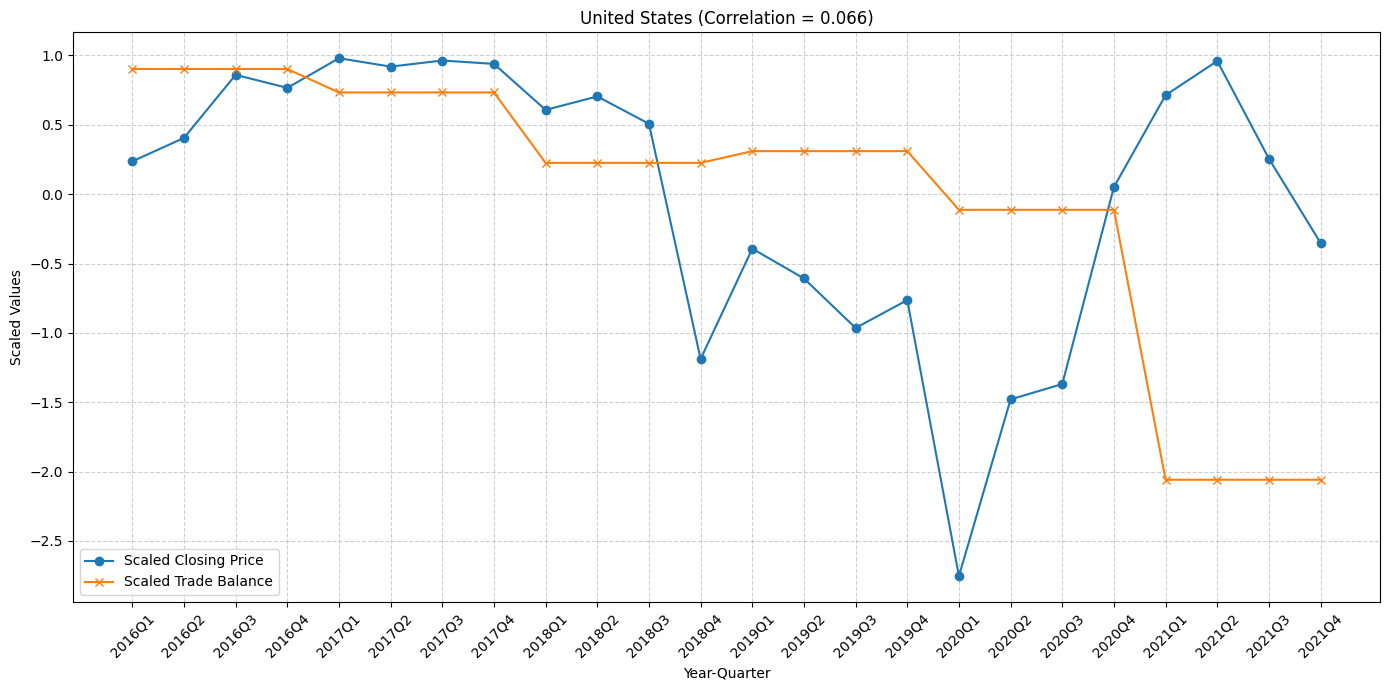


Query Subset for Hungary: [24 rows]
Execution Time: 0.0019 seconds
Country  Year Year_Quarter  <CLOSE>  Trade_Balance
Hungary  2016       2016Q1   858.68   1.100000e+10
Hungary  2016       2016Q2   849.76   1.100000e+10
Hungary Pearson Correlation: -0.899


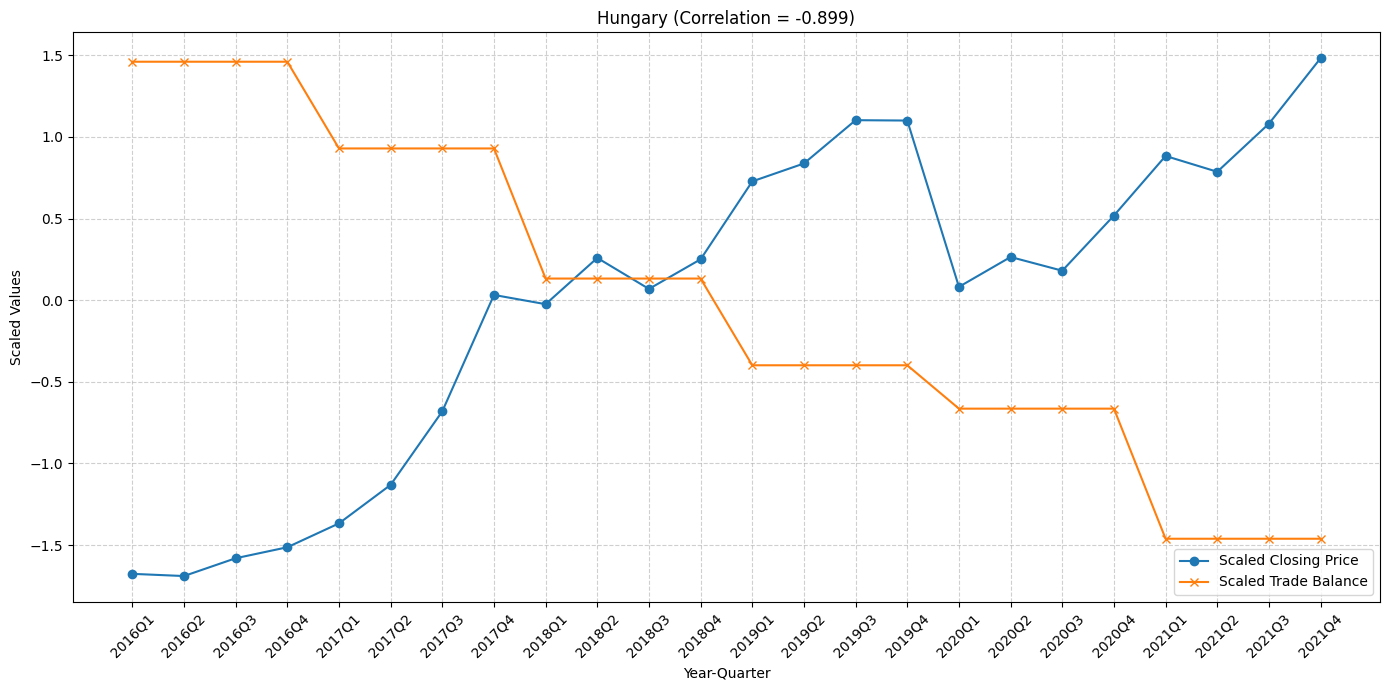


Query Subset for Japan: [24 rows]
Execution Time: 0.0014 seconds
Country  Year Year_Quarter  <CLOSE>  Trade_Balance
  Japan  2016       2016Q1   872.02   4.000000e+10
  Japan  2016       2016Q2   817.60   4.000000e+10
Japan Pearson Correlation: -0.645


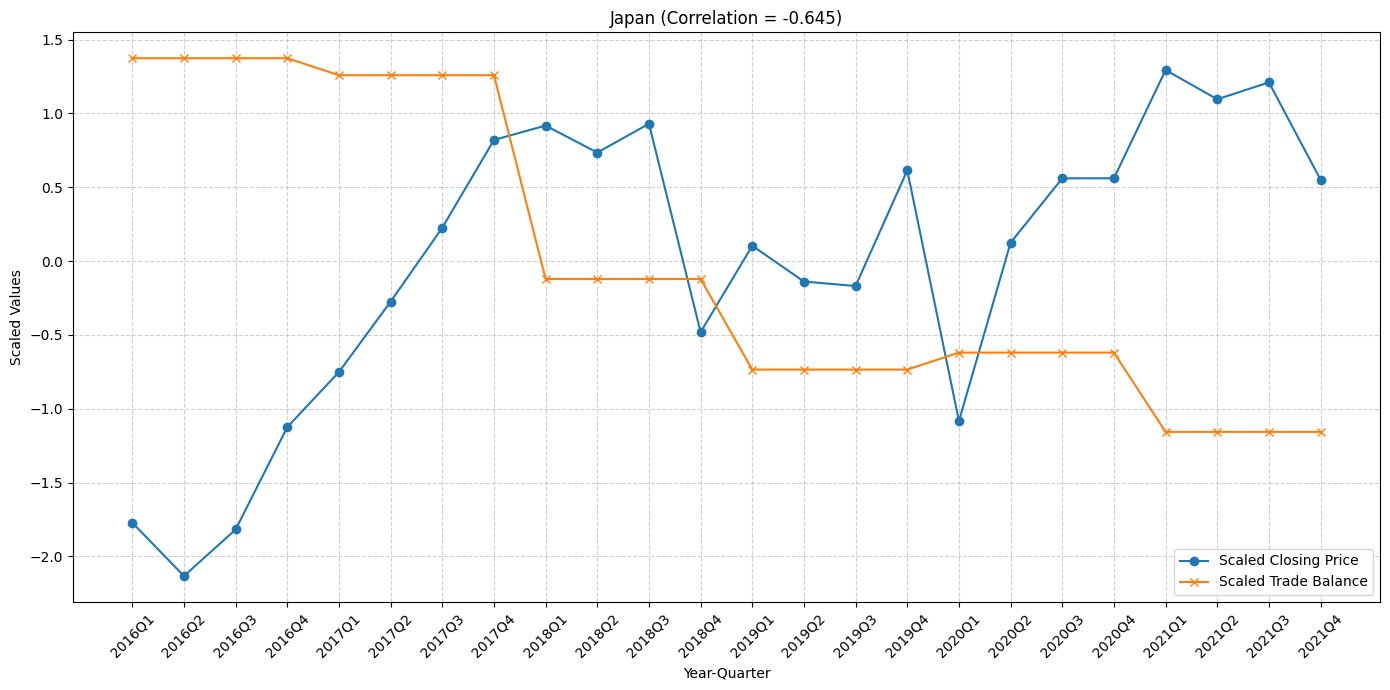


Query Subset for China, Hong Kong SAR: [24 rows]
Execution Time: 0.0014 seconds
             Country  Year Year_Quarter  <CLOSE>  Trade_Balance
China, Hong Kong SAR  2016       2016Q1   961.26   7000000000.0
China, Hong Kong SAR  2016       2016Q2   927.30   7000000000.0
China, Hong Kong SAR Pearson Correlation: -0.447


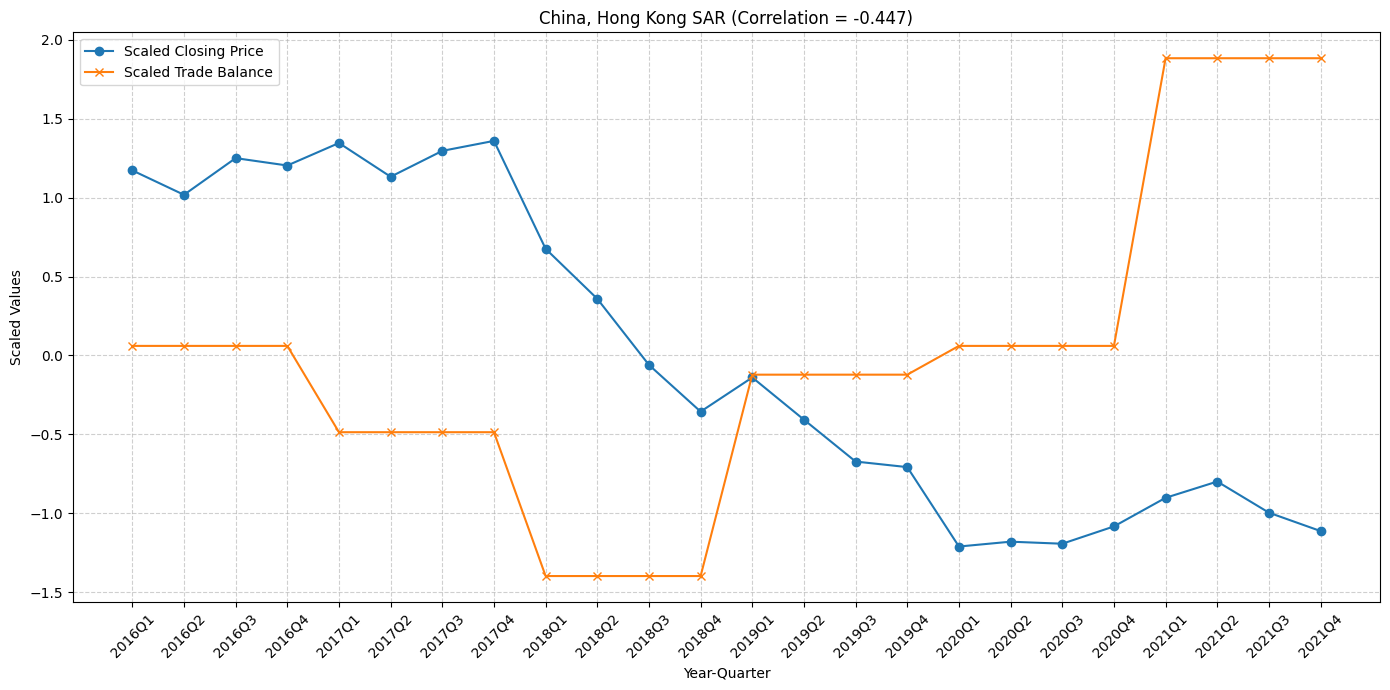


Query Subset for Germany: [24 rows]
Execution Time: 0.0014 seconds
Country  Year Year_Quarter  <CLOSE>  Trade_Balance
Germany  2016       2016Q1   964.04   2.600000e+11
Germany  2016       2016Q2   928.32   2.600000e+11
Germany Pearson Correlation: 0.534


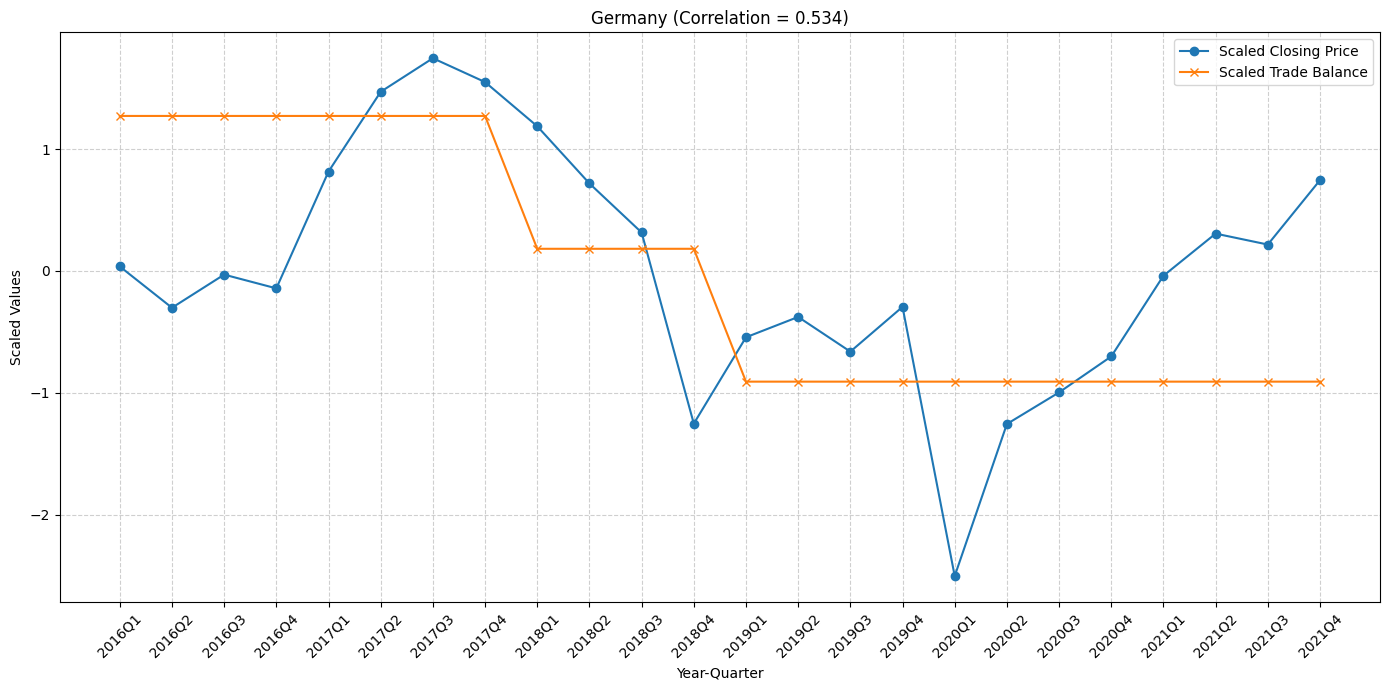


Query Subset for Poland: [24 rows]
Execution Time: 0.0026 seconds
Country  Year Year_Quarter    <CLOSE>  Trade_Balance
 Poland  2016       2016Q1 942.266667   1.400000e+10
 Poland  2016       2016Q2 932.526667   1.400000e+10
Poland Pearson Correlation: -0.432


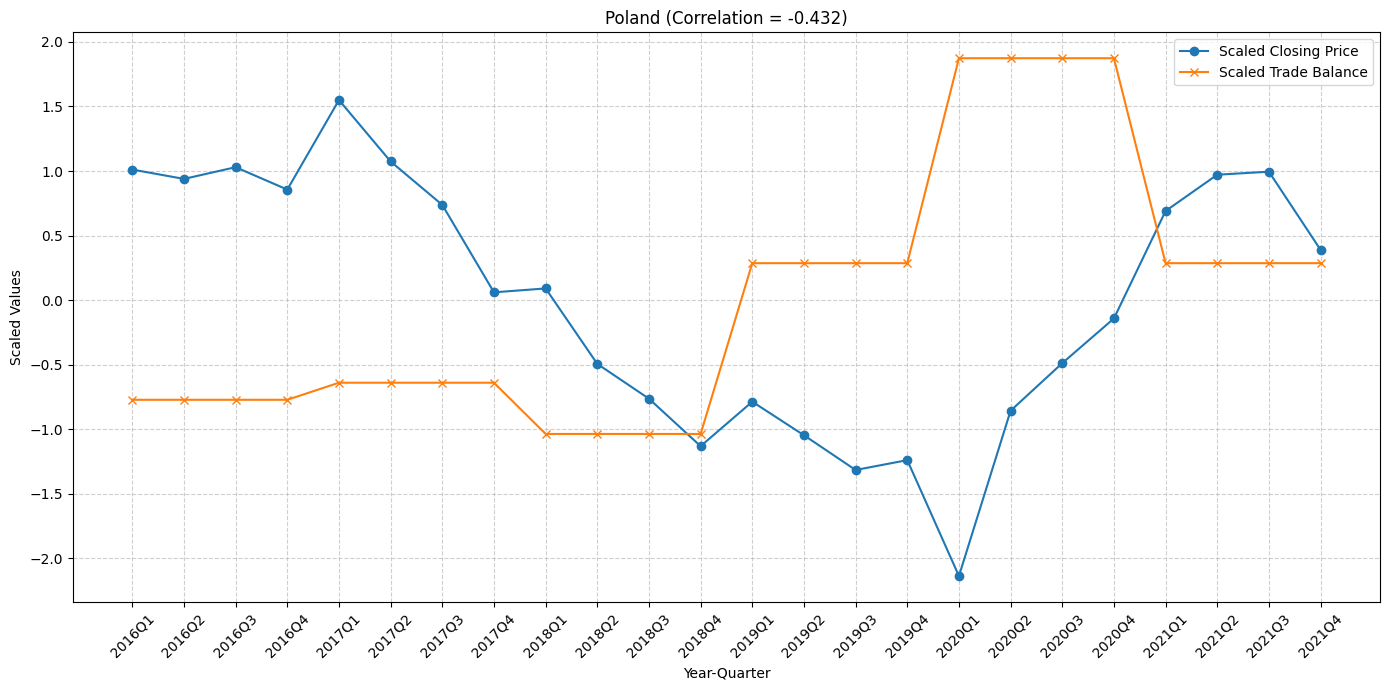

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import time

# Load your data from text file
data = pd.read_csv('finalMerged.txt', sep=',', engine='python')

data['Country'] = data['Country'].str.strip().str.replace('"', '')

# Calculate trade balance (Exports - Imports)
data['Trade_Balance'] = data['Exports of goods and services'] - data['Imports of goods and services']

# Select relevant columns
analysis_df = data[['Country', 'Year', 'Quarter', '<DATE>', '<CLOSE>',
                    'Exports of goods and services',
                    'Imports of goods and services', 'Trade_Balance']]

# Proper date conversion
analysis_df = analysis_df.copy()
analysis_df['<DATE>'] = pd.to_datetime(analysis_df['<DATE>'], format='%Y%m%d')

# Aggregate quarterly
aggregated_df = analysis_df.groupby(['Country', 'Year', 'Quarter']).agg({
    '<CLOSE>': 'mean',
    'Trade_Balance': 'mean'
}).reset_index()

aggregated_df = aggregated_df.rename(columns={'Quarter': 'Year_Quarter'})

countries_to_analyze = ['United States', 'Hungary', 'Japan', 'China, Hong Kong SAR', 'Germany', 'Poland']

for country in countries_to_analyze:
    start_time = time.perf_counter()
    
    # Explicit query method
    country_df = aggregated_df.query("Country == @country")

    if country == 'Poland':
        country_df = country_df.query("Year >= 2016")

    elapsed_time = time.perf_counter() - start_time

    # Drop NaNs
    country_df = country_df.dropna(subset=['<CLOSE>', 'Trade_Balance'])

    # Print query details and timing
    print(f"\nQuery Subset for {country}: [{len(country_df)} rows]")
    print(f"Execution Time: {elapsed_time:.4f} seconds")
    print(country_df.head(2).to_string(index=False))  # Printing two rows as a sample

    # Standardize
    country_df['Close_Scaled'] = (country_df['<CLOSE>'] - country_df['<CLOSE>'].mean()) / country_df['<CLOSE>'].std()
    country_df['TB_Scaled'] = (country_df['Trade_Balance'] - country_df['Trade_Balance'].mean()) / country_df['Trade_Balance'].std()

    # Pearson Correlation
    corr_value = country_df['<CLOSE>'].corr(country_df['Trade_Balance'])
    print(f"{country} Pearson Correlation: {corr_value:.3f}")

    # Plot
    plt.figure(figsize=(14,7))
    plt.plot(country_df['Year_Quarter'], country_df['Close_Scaled'], label='Scaled Closing Price', marker='o')
    plt.plot(country_df['Year_Quarter'], country_df['TB_Scaled'], label='Scaled Trade Balance', marker='x')
    plt.xlabel('Year-Quarter')
    plt.ylabel('Scaled Values')
    plt.title(f'{country} (Correlation = {corr_value:.3f})')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()
